<a href="https://colab.research.google.com/github/start94/MuseumLang/blob/main/project2_raffaele_diomaiuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importazione delle librerie

Prime 5 righe del dataset:
                                               Testo Codice Lingua
0  Statua in marmo di un imperatore romano del II...            it
1         Anfora greca con decorazioni a figure nere            it
2  Dipinto rinascimentale raffigurante la Madonna...            it
3         Elmo corinzio in bronzo del VI secolo a.C.            it
4         Manoscritto medievale con miniature dorate            it

Distribuzione delle lingue:
Codice Lingua
it    98
en    98
de    98
Name: count, dtype: int64

=== Naive Bayes ===
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

          de       1.00      1.00      1.00        24
          en       1.00      1.00      1.00        25
          it       1.00      1.00      1.00        25

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



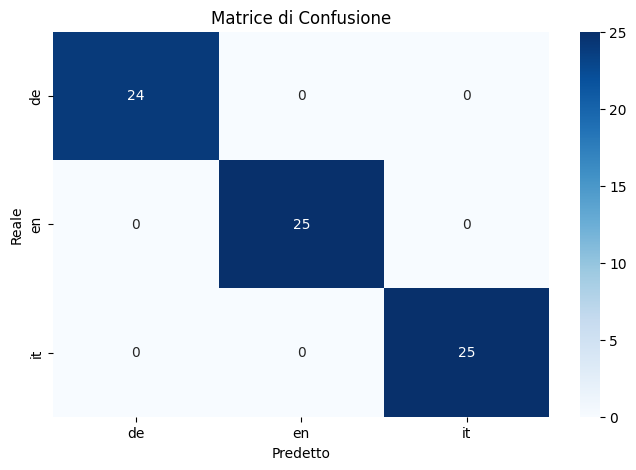


=== SVM ===
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

          de       1.00      0.96      0.98        24
          en       0.96      1.00      0.98        25
          it       1.00      1.00      1.00        25

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



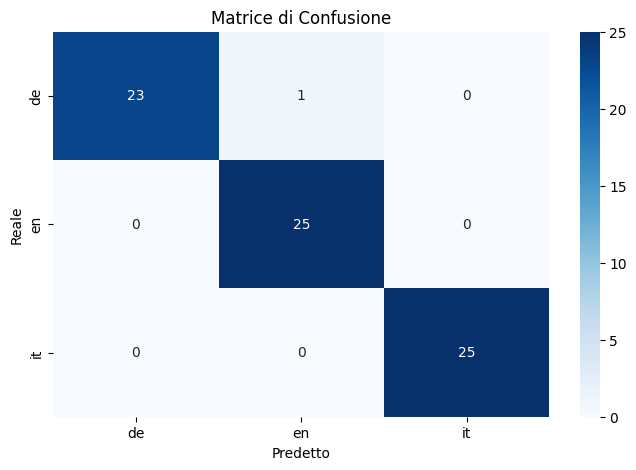


=== Random Forest ===
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

          de       1.00      1.00      1.00        24
          en       1.00      0.96      0.98        25
          it       0.96      1.00      0.98        25

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



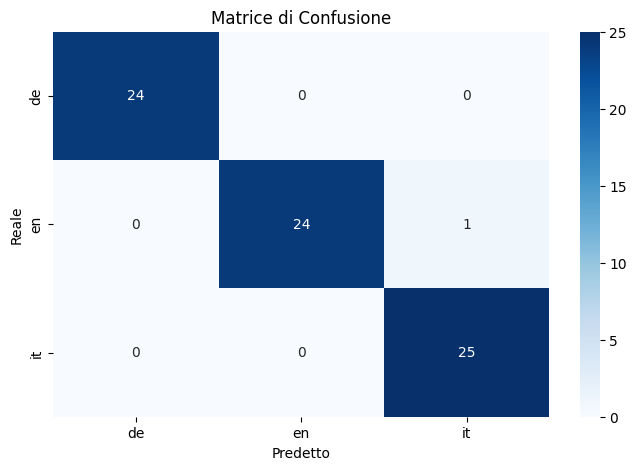

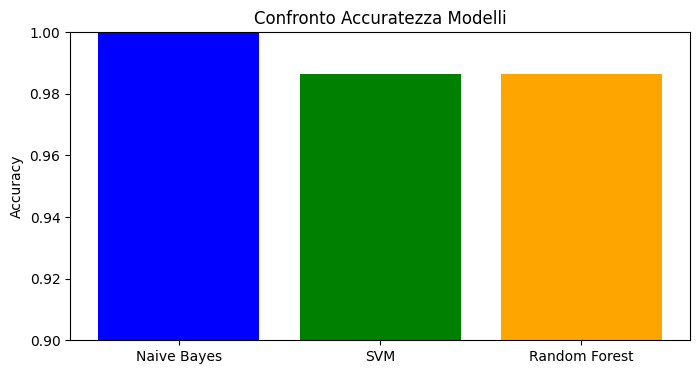



=== TEST SU ESEMPI REALI ===

Testo: Cette œuvre représente un paysage impressionniste ...
Predizione: it | Reale: fr
Esito: ❌ Errato

Testo: This masterpiece shows the technical innovation of...
Predizione: en | Reale: en
Esito: ✅ Corretto

Testo: Esta escultura del siglo XV muestra una gran atenc...
Predizione: it | Reale: es
Esito: ❌ Errato

Testo: Questo affresco rinascimentale è un esempio eccell...
Predizione: it | Reale: it
Esito: ✅ Corretto

Testo: Diese barocke Skulptur verkörpert die Bewegung und...
Predizione: de | Reale: de
Esito: ✅ Corretto

Testo: Ancient ceramic vase with geometric patterns...
Predizione: en | Reale: en
Esito: ✅ Corretto

Testo: Dipinto ad olio su tela del periodo barocco...
Predizione: it | Reale: it
Esito: ✅ Corretto

Testo: Statue en bronze représentant un héros mythologiqu...
Predizione: en | Reale: fr
Esito: ❌ Errato

Test caso ambiguo:
Testo: The sculpture shows amazing details
Predizione: en


In [1]:

# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Abilita la visualizzazione dei grafici inline
%matplotlib inline

# Caricamento del dataset
url = "https://raw.githubusercontent.com/Profession-AI/progetti-ml/refs/heads/main/Modello%20per%20l'identificazione%20della%20lingua%20dei%20testi%20di%20un%20museo/museo_descrizioni.csv"
df = pd.read_csv(url)

# Analisi esplorativa iniziale
print("Prime 5 righe del dataset:")
print(df.head())
print("\nDistribuzione delle lingue:")
print(df['Codice Lingua'].value_counts())

# Pulizia del testo
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, flags=re.I|re.A)
    text = text.lower()
    return text.strip()

df['cleaned_text'] = df['Testo'].apply(clean_text)

# Divisione del dataset
X = df['cleaned_text']
y = df['Codice Lingua']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Vettorizzazione TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Funzione per valutazione modelli (con grafici più piccoli)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Matrice di confusione ridimensionata
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title('Matrice di Confusione')
    plt.xlabel('Predetto')
    plt.ylabel('Reale')
    plt.show()

# Addestramento modelli
print("\n=== Naive Bayes ===")
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
evaluate_model(nb, X_test_tfidf, y_test)

print("\n=== SVM ===")
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_tfidf, y_train)
evaluate_model(svm, X_test_tfidf, y_test)

print("\n=== Random Forest ===")
rf = RandomForestClassifier(n_estimators=200, max_depth=50)
rf.fit(X_train_tfidf, y_train)
evaluate_model(rf, X_test_tfidf, y_test)

# Confronto performance con grafico più compatto
plt.figure(figsize=(8,4))
models = {'Naive Bayes': nb, 'SVM': svm, 'Random Forest': rf}
for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test_tfidf))
    plt.bar(name, acc, color=['blue', 'green', 'orange'][list(models.keys()).index(name)])

plt.title('Confronto Accuratezza Modelli')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# ======================
# TEST SU ESEMPI REALI
# ======================
test_cases = [
    ('Cette œuvre représente un paysage impressionniste typique du XIXe siècle', 'fr'),
    ('This masterpiece shows the technical innovation of Renaissance artists', 'en'),
    ('Esta escultura del siglo XV muestra una gran atención al detalle anatómico', 'es'),
    ('Questo affresco rinascimentale è un esempio eccellente di prospettiva lineare', 'it'),
    ('Diese barocke Skulptur verkörpert die Bewegung und Dynamik des Marmors', 'de'),
    ('Ancient ceramic vase with geometric patterns', 'en'),
    ('Dipinto ad olio su tela del periodo barocco', 'it'),
    ('Statue en bronze représentant un héros mythologique', 'fr')
]

# Funzione di predizione
def predict_language(text, model=svm):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    return model.predict(vectorized)[0]

# Esecuzione test
print("\n\n=== TEST SU ESEMPI REALI ===")
for text, true_label in test_cases:
    prediction = predict_language(text)
    print(f"\nTesto: {text[:50]}...")
    print(f"Predizione: {prediction} | Reale: {true_label}")
    print(f"Esito: {'✅ Corretto' if prediction == true_label else '❌ Errato'}")

# Test aggiuntivo con caso ambiguo
ambiguous_text = "The sculpture shows amazing details"
print("\nTest caso ambiguo:")
print(f"Testo: {ambiguous_text}")
print(f"Predizione: {predict_language(ambiguous_text)}")